**Caso de Estudio**

Se tiene el dataset framingham.csv para hacer un modelo de regresión logística que ayude a determinar si una persona puede sufrir enfermedad coronaria en los próximos 10 años, con un analisis al final sobre los resultados y el proceso realizado en el codigo

0. Cargar librerias y datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Aprendizaje Supervisado/framingham.xls'
df=pd.read_csv(path)
df=df.dropna()
print(df.shape)
df.head()

(3656, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


1. Modelo Regresion Logistico

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.drop(['TenYearCHD','education'], axis=1)
y = df['TenYearCHD']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Datos escalados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresion logistica
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train_scaled, y_train)

# Prediccion en el set de prueba
y_pred = model.predict(X_test_scaled)

# Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.55      0.09      0.15       122

    accuracy                           0.84       732
   macro avg       0.70      0.54      0.53       732
weighted avg       0.80      0.84      0.78       732


Confusion Matrix:
[[601   9]
 [111  11]]


In [ ]:
# Get the intercept and coefficients from the trained model
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print(f"Intercept (β0): {intercept:.4f}")
print("\nCoefficients (βi):")
# Assuming X_train_scaled is a numpy array, get feature names from original X_train
feature_names = X_train.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\nThe logistic regression equation (in terms of log-odds) is:")
print(f"ln(P(Personal.Loan=1) / (1 - P(Personal.Loan=1))) = {intercept:.4f} + ", end="")

for i, (feature, coef) in enumerate(zip(feature_names, coefficients)):
    if i > 0:
        print(" + ", end="")
    print(f"({coef:.4f} * {feature})", end="")

print()

Intercept (β0): -2.0508

Coefficients (βi):
male: 0.3152
age: 0.5906
currentSmoker: 0.1061
cigsPerDay: 0.1778
BPMeds: 0.0403
prevalentStroke: 0.0662
prevalentHyp: 0.1077
diabetes: 0.0635
totChol: 0.1298
sysBP: 0.3489
diaBP: -0.0818
BMI: 0.0226
heartRate: -0.0695
glucose: 0.1412

The logistic regression equation (in terms of log-odds) is:
ln(P(Personal.Loan=1) / (1 - P(Personal.Loan=1))) = -2.0508 + (0.3152 * male) + (0.5906 * age) + (0.1061 * currentSmoker) + (0.1778 * cigsPerDay) + (0.0403 * BPMeds) + (0.0662 * prevalentStroke) + (0.1077 * prevalentHyp) + (0.0635 * diabetes) + (0.1298 * totChol) + (0.3489 * sysBP) + (-0.0818 * diaBP) + (0.0226 * BMI) + (-0.0695 * heartRate) + (0.1412 * glucose)


Registro (el primero en X_test):
male                 0.00
age                 47.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            223.00
sysBP              120.00
diaBP               74.00
BMI                 20.27
heartRate           80.00
glucose             76.00
Name: 572, dtype: float64

Actual class for this record: 0

Paso 1: Calcular el z-value (linear combination): -3.1136
Paso 2: Calcular la probabilidad de 10year risk of CHD=1: 0.0426
Paso 3: Clasificación con un threshold (0.5): 0
Result: El modelo predice No Riesgo de CHD.


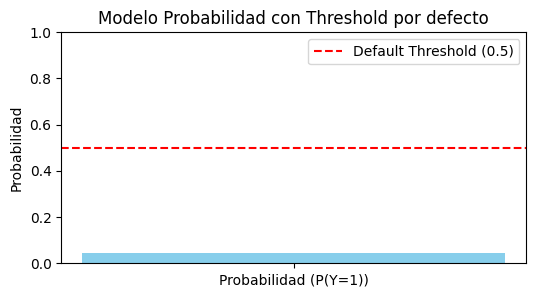

In [ ]:
sample_record_scaled = X_test_scaled[0, :]
sample_record_original = X_test.iloc[0, :]
actual_class = y_test.iloc[0]

print(f"Registro (el primero en X_test):")
print(sample_record_original)
print(f"\nActual class for this record: {actual_class}")

# Paso 1: Calcular la combinación lineal (z-value)
# z = β0 + β1*x1 + β2*x2 + ... + βn*xn
z = intercept + np.sum(coefficients * sample_record_scaled)

print(f"\nPaso 1: Calcular el z-value (linear combination): {z:.4f}")

# Paso 2: Calcular la probabilidad usando la función logística
# P(Y=1|X) = 1 / (1 + e^(-z))
probability = 1 / (1 + np.exp(-z))

print(f"Paso 2: Calcular la probabilidad de 10year risk of CHD=1: {probability:.4f}")

# Step 3: Calcular basado en el threshold (por defecto es 0.5)
predicted_class = 1 if probability >= 0.5 else 0

print(f"Paso 3: Clasificación con un threshold (0.5): {predicted_class}")
print(f"Result: El modelo predice {'Riesgo de CHD' if predicted_class == 1 else 'No Riesgo de CHD'}.")


plt.figure(figsize=(6, 3))
plt.bar(['Probabilidad (P(Y=1))'], [probability], color='skyblue')
plt.axhline(y=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.ylim(0, 1)
plt.ylabel('Probabilidad')
plt.title('Modelo Probabilidad con Threshold por defecto')
plt.legend()
plt.show()


In [ ]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Set a custom threshold (e.g., 0.3 instead of the default 0.5)
custom_threshold = 0.15
y_pred_custom_threshold = (y_pred_proba >= custom_threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom_threshold)
report_custom = classification_report(y_test, y_pred_custom_threshold)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom_threshold)

print(f"Accuracy with custom threshold ({custom_threshold}): {accuracy_custom}")
print("\nClassification Report with custom threshold:")
print(report_custom)
print("\nConfusion Matrix with custom threshold:")
print(conf_matrix_custom)

Accuracy with custom threshold (0.15): 0.680327868852459

Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       610
           1       0.29      0.63      0.40       122

    accuracy                           0.68       732
   macro avg       0.60      0.66      0.59       732
weighted avg       0.80      0.68      0.72       732


Confusion Matrix with custom threshold:
[[421 189]
 [ 45  77]]


**Analisis de Resultados**

Para este proceso se realizo una limpieza de los datos en primera instancia eliminando las celdas con valores NaN los cuales no eran compatibles para la realizacion del modelo, luego se hizo un modelo con punto de corte de 0.5 este con (es el valor que viene por default) y con una exactitud o accuracy de 83%, precision para casos positivos(1) de 55% y de casos negativos(0) del 84%, una sensibilidad para casos positivos del 9% y de casos negativos 99% de ademas se obtuvieron los siguientes resultados en la matriz de confunsion la cual nos da entender mejor el modelo: VN(Verdaderos Negativos) en el lado superior izquierdo de la matriz con valor de 601 los cuales son los casos que son negativos para CHD y el modelo los detecta como negativos, los FP(Falsos positivos) en el lado superior derecho con valor de 9 que indica los casos que realmente dan negativo pero el modelo da como positivo tambien son conocidos como error tipo 1, luego estan los FN(Falsos negativos) casos que son positivos pero el modelo detecta como negativos con valor de 111 tambien conocidos como error tipo 2 y por ultimo VP(Verdaderos positivos) casos que son positivos y el sistema dectecta como negativo con valor 11, esto nos indica que con este punto medio el modelo estaba teniendo mas errores tipo 2 o FN que son casos que deberian ser positivos y para este caso deberian ser mas castigados para poder atender a los pacientes que el modelo no reconoce como positivos pero si lo son; para esto se realizo el modelo nuevamente pero con punto de corte en 0.15 penalizando mas el error tipo 2 teniendo menos casos que son positivos o pueden padecer la enfermedad en los proximos 10 años pero el modelo no los estaba reconociendo de esta manera disminuyendo los FN y aumentando los VP con valores de 45 y 77 casos respectivamente y aumentado los errores tipo 1 y disminuyendo los VN con valores de 189 y 421 respectivamente ademas la exactitud o accuracy del modelo disminuyo al 68% pero la sensibilidad o recall del modelo aumento a 63% en casos positivos y 69% en casos negativos, este ultimo modelo es mejor porque castiga mas a casos que no estan propensos a la enfermedad y mejora su prediccion de casos positivos reales.